# Fashion Classification using Deep Learning

Dataset:

- Small: https://github.com/alexeygrigorev/clothing-dataset-small.git
- Full: https://github.com/alexeygrigorev/clothing-dataset.git 

Links:

- https://cs231n.github.io

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
Updating files:  39% (1486/3783)
Updating files:  40% (1514/3783)
Updating files:  41% (1552/3783)
Updating files:  42% (1589/3783)
Updating files:  43% (1627/3783)
Updating files:  44% (1665/3783)
Updating files:  45% (1703/3783)
Updating files:  46% (1741/3783)
Updating files:  47% (1779/3783)
Updating files:  48% (1816/3783)
Updating files:  49% (1854/3783)
Updating files:  50% (1892/3783)
Updating files:  51% (1930/3783)
Updating files:  52% (1968/3783)
Updating files:  53% (2005/3783)
Updating files:  54% (2043/3783)
Updating files:  55% (2081/3783)
Updating files:  56% (2119/3783)
Updating files:  57% (2157/3783)
Updating files:  58% (2195/3783)
Updating files:  59% (2232/3783)
Updating files:  60% (2270/3783)
Updating files:  61% (2308/3783)
Updating files:  62% (2346/3783)
Updating files:  63% (2384/3783)
Updating files:  64% (2422/3783)
Updating files:  65% (2459/3783)
Updating files:  66% (2497/3783)
Updating files:  67% (2535/3783)
Up

## Tensorflow and Keras

Tensorflow is a library for deep learning developed by Google. Keras is a high-level API for building and training deep learning models, which is now integrated into Tensorflow.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img

%matplotlib inline

### Load image

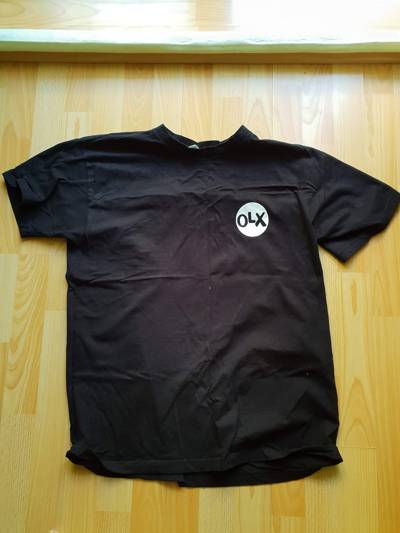

In [8]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [9]:
img = load_img(fullname, target_size=(299, 299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x191EE4D9BE0>


`img` is a PIL, python image library object. Basically the image has 3 channels (RGB) and each channel has width * height pixels (0-255 - 1 byte). We can easily translate an image into a numpy array:

In [10]:
x = np.array(img)
x.shape

(299, 299, 3)

In [18]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## Pre-trained convolutional neural networks

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models in Keras: https://keras.io/api/applications/

For now we use `Xception` model as the light and fast model.

In [19]:
!pip install h5py --no-binary=h5py 

!pip install h5py --no-binary=h5py 

In [13]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

In [1]:
import h5py
print(h5py.__version__)

3.15.1


In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))
model

<Functional name=xception, built=True>

In [21]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [22]:
X = preprocess_input(X)

In [23]:
pred = model.predict([X])
pred.shape

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_402
Received: inputs=('Tensor(shape=(1, 299, 299, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 1000)

In [24]:
decode_predictions(pred, top=3)[0]

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[('n03595614', 'jersey', 0.6792447),
 ('n02916936', 'bulletproof_vest', 0.03960031),
 ('n04370456', 'sweatshirt', 0.035299595)]

## Convolutional neural networks

Types of layers: convolutional and dense

#### Convolutional layers and filters

**Convolutional layers consists of filters**, kind of a small features with small size (3x3, 5x5, etc). Each filter is convolved with the input image (or the output of the previous layer) to produce a feature map. The idea is that each filter can detect a specific feature in the image, such as edges, textures, or patterns.

**High values** in the feature map **indicate the presence of the feature** detected by the filter at that location in the input image.

So the **input is image** and **output is feature map**.

YOu can do with multiple filters, so you can detect multiple features in the image. For example, first convolutional layer with 3 simple filter, then deeper and higher level of layers with more complex filters.

The role of convolutional layers is to **extract features from the input image** into vector representations that can be used for classification.

#### Dense layers

The reason is called dense layers is that each element on the input is connected to every element in the previous layer.

The role of dense layers is to **perform classification prediction based on the features extracted by the convolutional layers**.

$g(x) = sigmoid(x^Tw)$ where $x$ is the input vector, $w$ is the weight vector, and $sigmoid$ is the activation function that maps the output to a value between {0} = no t-shirt and {1} = t-shirt.

## Transfer learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. Usually a pretrained model is trained with large volume of images and that is why the convolutional layers and vector representation of this model can be used for other tasks as well. However, the dense layers need to be retrained because they are specific to the dataset to make predictions with. In our problem, we want to keep convoluational layers but we want to train new dense layers.

- reading data with `ImageDataGenerator`
- train `Xception` model on smaller images (150x150)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32 # images 
)
train_ds

Found 3068 images belonging to 10 classes.


In [30]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [31]:
X, y = next(train_ds)
X.shape, y.shape

((32, 150, 150, 3), (32, 10))

In [32]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

Basically those target can be called multiclass classification because we have multiple classes (10 classes in total).

In [34]:
# do also with validation data
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32, # images 
    shuffle=False
)
val_ds

Found 341 images belonging to 10 classes.


In [35]:
base_model = Xception(weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False # means dont include top cause containing the dense layers and prediction
)
base_model.trainable = False # we dont want to change the convolutional base layer

In [52]:
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False) # we set training to false to avoid updating batchnorm layers

pooling = keras.layers.GlobalAveragePooling2D() # we use pooling for flattening the output of conv layers
vectors = pooling(base) # without pooling the layers will be 4D tensors (32, 5, 5, 2048)
# vectors = keras.layers.GlobalAveragePooling2D()(base) 

outputs = vectors

model = keras.Model(inputs=inputs, outputs=outputs)

In [53]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [46]:
preds.shape

(32, 2048)

In [49]:
preds[0]

array([-0.1694034 , -0.58288205,  0.81474066, -0.23023021,  0.0905216 ,
        0.46125108,  0.15016834, -0.1889798 ,  1.2486975 , -0.6862559 ],
      dtype=float32)

32 is batch or number of images. We need to get the output with shape (32, 10) because we have 10 classes.

In [54]:
outputs = keras.layers.Dense(10)(vectors) 
model = keras.Model(inputs=inputs, outputs=outputs)
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [55]:
preds.shape

(32, 10)

Now we use optimizer for finding the best weights for our dense layers.

In [56]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without softmax

model.compile(optimizer=optimizer, 
              loss=loss, 
              metrics=['accuracy'])

In [57]:
history = model.fit(train_ds,
                    epochs=10, # go over the data 10 times
                    validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 625ms/step - accuracy: 0.6773 - loss: 1.2186 - val_accuracy: 0.7537 - val_loss: 0.9244
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 649ms/step - accuracy: 0.8237 - loss: 0.5532 - val_accuracy: 0.7742 - val_loss: 0.8147
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 620ms/step - accuracy: 0.8706 - loss: 0.3790 - val_accuracy: 0.7713 - val_loss: 0.9455
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 565ms/step - accuracy: 0.9055 - loss: 0.2624 - val_accuracy: 0.7918 - val_loss: 0.8509
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 565ms/step - accuracy: 0.9371 - loss: 0.1706 - val_accuracy: 0.8299 - val_loss: 0.8094
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 643ms/step - accuracy: 0.9664 - loss: 0.0964 - val_accuracy: 0.7977 - val_loss: 0.9903
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 579ms/step - accuracy: 0.9795 - loss: 0.0672 - val_accuracy: 0.8123 - val_loss: 0.8732
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 620ms/step - accuracy: 0.9853 - loss: 0.0496 - val_accu

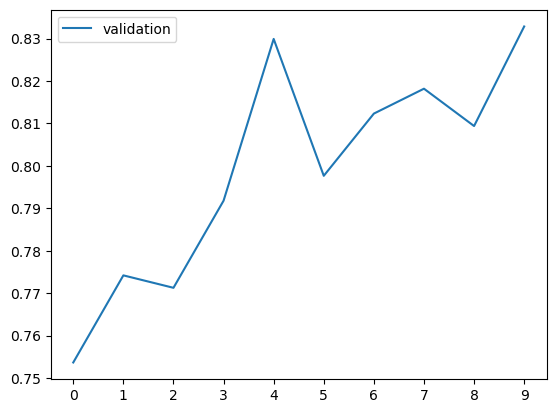

In [60]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

- what's the learning rate = how fast you read, the higher learning rate sometimes could be overfit
- trying different values, we need to find the fast learning rate but not quite fast

In [ ]:
def make_model(learning_rate):
    base_model = Xception(weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False # means dont include top cause containing the dense layers and prediction
    )
    base_model.trainable = False # we dont want to change the convolutional base layer

    ######################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False) # we set training to false to avoid updating batchnorm layers
    vectors = keras.layers.GlobalAveragePooling2D()(base) 
    outputs = keras.layers.Dense(10)(vectors) 
    model = keras.Model(inputs=inputs, outputs=outputs)

    ######################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without softmax
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [62]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds,
                        epochs=10, # go over the data 10 times
                        validation_data=val_ds)
    scores[lr] = history.history
    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 603ms/step - accuracy: 0.3618 - loss: 1.8917 - val_accuracy: 0.4809 - val_loss: 1.6132
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 624ms/step - accuracy: 0.5600 - loss: 1.3762 - val_accuracy: 0.5924 - val_loss: 1.2677
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 587ms/step - accuracy: 0.6382 - loss: 1.1389 - val_accuracy: 0.6716 - val_loss: 1.0858
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.6877 - loss: 0.9980 - val_accuracy: 0.7038 - val_loss: 0.9727
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 623ms/step - accuracy: 0.7119 - loss: 0.9049 - val_accuracy: 0.7390 - val_loss: 0.8978
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 592ms/step - accuracy: 0.7334 - loss: 0.8373 - val_accuracy: 0.7419 - val_loss: 0.8474
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 630ms/step - accuracy: 0.7484 - loss: 0.7854 - val_accuracy: 0.7419 - val_loss: 0.8023
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 600ms/step - accuracy: 0.7611 - loss: 0.7422 - v

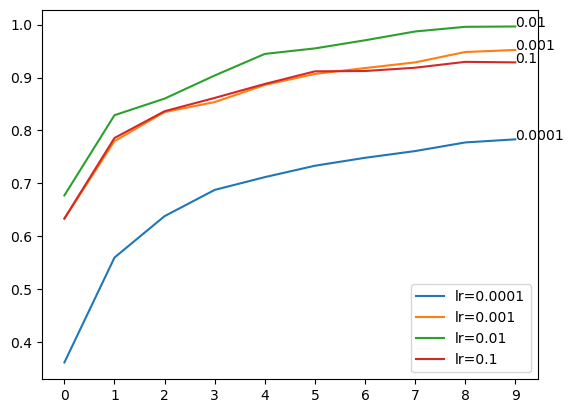

In [68]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=f'lr={lr}')
    plt.text(9, hist['accuracy'][-1], f'{lr}')

plt.xticks(np.arange(10))
plt.legend()

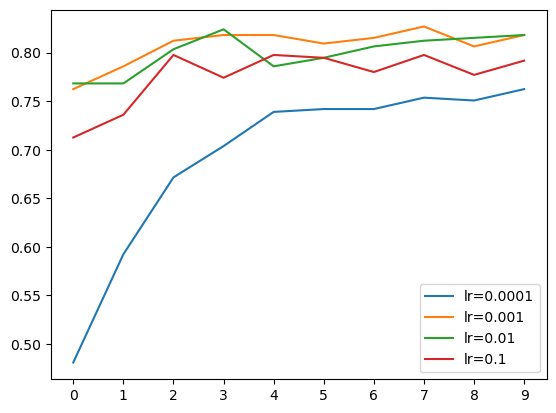

In [69]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'lr={lr}')

plt.xticks(np.arange(10))
plt.legend()

In [70]:
del scores[0.1]
del scores[0.0001]

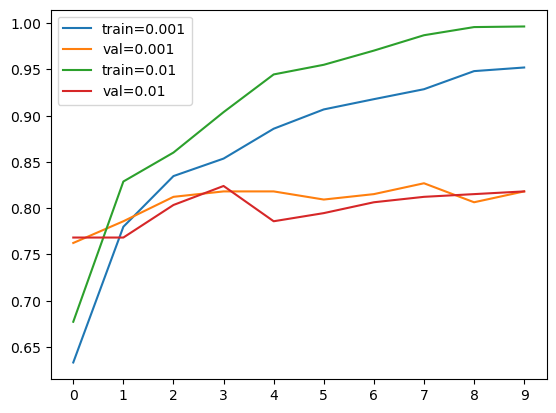

In [71]:
for lr, history in scores.items():
    plt.plot(history['accuracy'], label=('train=%s' % lr))
    plt.plot(history['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

For the plot, we need to do the checkpoint because when the accuracy becomes high, then the next epochs could decrease the accuracy.

## Checkpointing

is a way to saving our model after each iterations or when some conditions are met

- Saving the best model only
- Training a model with callbacks

In [75]:
model.save('model_v1.h5', save_format='h5')

In [76]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [78]:
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
history = model.fit(train_ds,
                    epochs=10, # go over the data 10 times
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.5283 - loss: 1.4446

96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 553ms/step - accuracy: 0.6340 - loss: 1.0911 - val_accuracy: 0.7889 - val_loss: 0.7345
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 541ms/step - accuracy: 0.7842 - loss: 0.6242 - val_accuracy: 0.7859 - val_loss: 0.6544
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.8356 - loss: 0.5134

96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 542ms/step - accuracy: 0.8344 - loss: 0.5039 - val_accuracy: 0.8094 - val_loss: 0.6116
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8665 - loss: 0.4243

96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 571ms/step - accuracy: 0.8673 - loss: 0.4253 - val_accuracy: 0.8123 - val_loss: 0.5733
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.8820 - loss: 0.3757

96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 557ms/step - accuracy: 0.8875 - loss: 0.3687 - val_accuracy: 0.8182 - val_loss: 0.5915
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.9160 - loss: 0.3292

96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 568ms/step - accuracy: 0.9133 - loss: 0.3237 - val_accuracy: 0.8387 - val_loss: 0.5522
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 547ms/step - accuracy: 0.9224 - loss: 0.2889 - val_accuracy: 0.8211 - val_loss: 0.5569
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 537ms/step - accuracy: 0.9325 - loss: 0.2585 - val_accuracy: 0.8387 - val_loss: 0.5408
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 535ms/step - accuracy: 0.9433 - loss: 0.2309 - val_accuracy: 0.8182 - val_loss: 0.5460
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 547ms/step - accuracy: 0.9557 - loss: 0.2088 - val_accuracy: 0.8270 - val_loss: 0.5353


## Adding more layers

- adding more inner dense layer
- experimenting with different sizes of inner layer

It is also possible to add more layers between the vector representation layer and the output layer to perform intermediate processing of the vector representation. These layers are the same dense layers as the output but the difference is that these layers use relu activation function for non-linearity.

Like learning rates, we should also experiment with different values of inner layer sizes:

In [79]:
# Function to define model by adding new dense layer
def make_model(learning_rate=0.01, size_inner=100): # default layer size is 100
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # activation function 'relu'
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [80]:
# Experiement different number of inner layer with best learning rate
# Note: We should've added the checkpoint for training but for simplicity we are skipping it
learning_rate = 0.001

scores = {}

# List of inner layer sizes
sizes = [10, 100, 1000]

for size in sizes:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 81s 807ms/step - accuracy: 0.5235 - loss: 1.5159 - val_accuracy: 0.6745 - val_loss: 1.0418
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 584ms/step - accuracy: 0.7102 - loss: 0.8698 - val_accuracy: 0.7654 - val_loss: 0.7572
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 579ms/step - accuracy: 0.7855 - loss: 0.6490 - val_accuracy: 0.7771 - val_loss: 0.6593
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 527ms/step - accuracy: 0.8305 - loss: 0.5256 - val_accuracy: 0.7918 - val_loss: 0.6282
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 521ms/step - accuracy: 0.8667 - loss: 0.4406 - val_accuracy: 0.7947 - val_loss: 0.5894
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 528ms/step - accuracy: 0.8879 - loss: 0.3740 - val_accuracy: 0.8240 - val_loss: 0.5478
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 525ms/step - accuracy: 0.9035 - loss: 0.3281 - val_accuracy: 0.8182 - val_loss: 0.5405
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 532ms/step - accuracy: 0.9228 - loss: 0.2848 - val_a

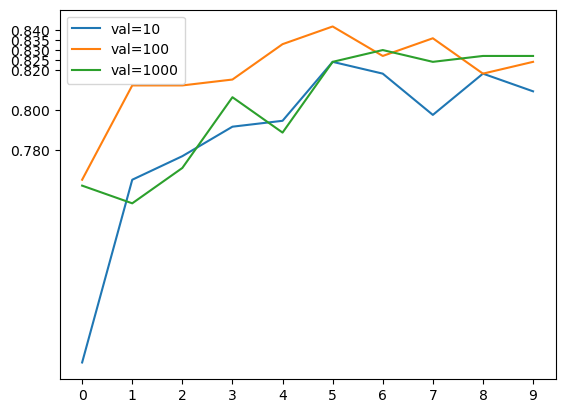

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.8, 0.82, 0.825, 0.83, 0.835, 0.84])
plt.legend()

## Regularization and Dropout

Dropout is a technique that prevents overfitting in neural networks **by randomly dropping nodes of a layer during training**. As a result, the trained model works as an ensemble model consisting of multiple neural networks.

- regularization by freezing a part of the network
- adding dropout to our model
- experimenting with different values

We'll use the learning rate and layer size values for the next experiment along with different values of dropout rates:

In [85]:
# Function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # add dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [86]:
# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [87]:
# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 100

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.5891 - loss: 1.2306

96/96 ━━━━━━━━━━━━━━━━━━━━ 67s 658ms/step - accuracy: 0.6682 - loss: 0.9645 - val_accuracy: 0.7771 - val_loss: 0.6407
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.8329 - loss: 0.5013

96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 617ms/step - accuracy: 0.8243 - loss: 0.5075 - val_accuracy: 0.7918 - val_loss: 0.5734
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.8924 - loss: 0.3593

96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 609ms/step - accuracy: 0.8817 - loss: 0.3631 - val_accuracy: 0.8094 - val_loss: 0.5567
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.9141 - loss: 0.2665

96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 610ms/step - accuracy: 0.9179 - loss: 0.2602 - val_accuracy: 0.8123 - val_loss: 0.5654
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 609ms/step - accuracy: 0.9456 - loss: 0.1837 - val_accuracy: 0.8035 - val_loss: 0.5808
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 607ms/step - accuracy: 0.9664 - loss: 0.1380 - val_accuracy: 0.7918 - val_loss: 0.6978
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9788 - loss: 0.1011

96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 608ms/step - accuracy: 0.9801 - loss: 0.1001 - val_accuracy: 0.8299 - val_loss: 0.5860
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.9928 - loss: 0.0627 - val_accuracy: 0.8182 - val_loss: 0.5978
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 600ms/step - accuracy: 0.9967 - loss: 0.0430 - val_accuracy: 0.8240 - val_loss: 0.6069
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 602ms/step - accuracy: 0.9990 - loss: 0.0309 - val_accuracy: 0.8240 - val_loss: 0.6506
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 598ms/step - accuracy: 0.9993 - loss: 0.0235 - val_accuracy: 0.8240 - val_loss: 0.6473
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 598ms/step - accuracy: 0.9993 - loss: 0.0191 - val_accuracy: 0.8065 - val_loss: 0.6588
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 58s 600ms/step - accuracy: 0.9990 - loss: 0.0178 - val_accuracy: 0.8240 - val_loss: 0.6811
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 632ms/step - accuracy: 0.9997 - loss: 0.0132 - val_accuracy: 

96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 581ms/step - accuracy: 0.8387 - loss: 0.4665 - val_accuracy: 0.8328 - val_loss: 0.5798
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 577ms/step - accuracy: 0.8729 - loss: 0.3599 - val_accuracy: 0.8094 - val_loss: 0.5809
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 577ms/step - accuracy: 0.9126 - loss: 0.2828 - val_accuracy: 0.8094 - val_loss: 0.5681
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.9305 - loss: 0.2186

96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 575ms/step - accuracy: 0.9319 - loss: 0.2212 - val_accuracy: 0.8387 - val_loss: 0.5551
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 573ms/step - accuracy: 0.9426 - loss: 0.1844 - val_accuracy: 0.8065 - val_loss: 0.6476
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 575ms/step - accuracy: 0.9573 - loss: 0.1524 - val_accuracy: 0.8211 - val_loss: 0.5742
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 578ms/step - accuracy: 0.9723 - loss: 0.1176 - val_accuracy: 0.8211 - val_loss: 0.5975
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 56s 580ms/step - accuracy: 0.9756 - loss: 0.0958 - val_accuracy: 0.8270 - val_loss: 0.5630
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 623ms/step - accuracy: 0.9804 - loss: 0.0801 - val_accuracy: 0.8182 - val_loss: 0.6198
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 573ms/step - accuracy: 0.9850 - loss: 0.0700 - val_accuracy: 0.8211 - val_loss: 0.6174
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 63s 658ms/step - accuracy: 0.9899 - loss: 0.0564 - val_accuracy: 0

96/96 ━━━━━━━━━━━━━━━━━━━━ 51s 535ms/step - accuracy: 0.9632 - loss: 0.0958 - val_accuracy: 0.8416 - val_loss: 0.7015


0.8
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 592ms/step - accuracy: 0.4100 - loss: 1.7755 - val_accuracy: 0.6540 - val_loss: 1.1323
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 539ms/step - accuracy: 0.5254 - loss: 1.3723 - val_accuracy: 0.7273 - val_loss: 0.9590
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 539ms/step - accuracy: 0.5704 - loss: 1.1976 - val_accuracy: 0.7419 - val_loss: 0.8308
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 540ms/step - accuracy: 0.6076 - loss: 1.1145 - val_accuracy: 0.7654 - val_loss: 0.7781
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 541ms/step - accuracy: 0.6069 - loss: 1.1181 - val_accuracy: 0.7654 - val_loss: 0.7558
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 545ms/step - accuracy: 0.6245 - loss: 1.0321 - val_accuracy: 0.7918 - val_loss: 0.7144
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 555ms/step - accuracy: 0.6512 - loss: 0.9894 - val_accuracy:

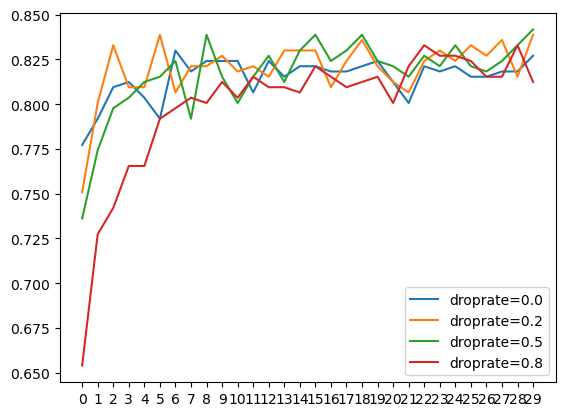

In [88]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('droprate=%s' % droprate))

plt.xticks(np.arange(30))
# plt.ylim(0.78, 0.86)
plt.legend()

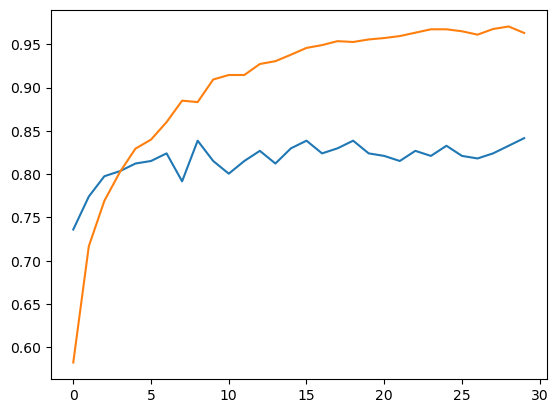

In [92]:
hist = scores[0.5] 
plt.plot(hist['val_accuracy'])
plt.plot(hist['accuracy'])

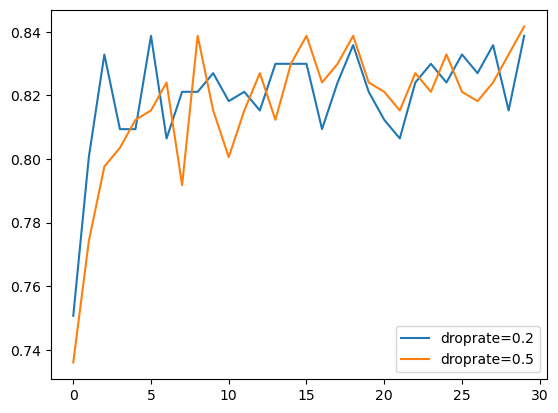

In [91]:
hist = scores[0.2] 
plt.plot(hist['val_accuracy'], label=('droprate=0.2'))

hist = scores[0.5] 
plt.plot(hist['val_accuracy'], label=('droprate=0.5'))

# plt.plot(hist['accuracy'], label=('droprate=%s' % droprate))
plt.legend()

## Data augmentation

- different data augmentations
- training a model with augmentations
- how to select data augmentations?

Data augmentation is a process of artifically **increasing the amount of data** by generating new images from existing images. This includes **adding minor alterations to images by flipping, cropping, rotation, shift, shear, zoom in/out, blackpath, adding brightness and/or contrast**, and many more.

Find the code details here: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-07-neural-nets/07-augmentations.ipynb

Keras `ImageDataGenerator` class has many parameters for data augmentation that we can use for generating data. Important thing to remember that the data augmentation should only be implemented on train data, not the validation. Here's how we can generate augmented data for training the model:

In [93]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    # rotation_range=30,
    # width_shift_range=10.0,
    # height_shift_range=10.0,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small/train',
                                         target_size=(150,150),
                                         batch_size=32)

# Create image generator for train data and also augment the images
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input # we dont wanna change validation data
    # rotation_range=30,
    # width_shift_range=10.0,
    # height_shift_range=10.0,
    # shear_range=10,
    # zoom_range=0.1,
    # vertical_flip=True
)

val_ds = val_gen.flow_from_directory(directory='./clothing-dataset-small/validation',
                                         target_size=(150,150),
                                         batch_size=32,
                                         shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


### Choosing Augmentations

- use your own judgment
- look at the dataset, what kind of variations are there?
- are the objects always centered? rotate or shift?
- tune it as a hyperparameter. train it for 10-20 epochs and see if it is better, if still the same add more epochs

In [94]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5662 - loss: 1.3085 - val_accuracy: 0.7507 - val_loss: 0.7747
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 775ms/step - accuracy: 0.6933 - loss: 0.9070 - val_accuracy: 0.7654 - val_loss: 0.6888
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 793ms/step - accuracy: 0.7259 - loss: 0.7965 - val_accuracy: 0.7713 - val_loss: 0.6789
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 775ms/step - accuracy: 0.7555 - loss: 0.7057 - val_accuracy: 0.7918 - val_loss: 0.6641
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 759ms/step - accuracy: 0.7761 - loss: 0.6614 - val_accuracy: 0.7947 - val_loss: 0.6132
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 755ms/step - accuracy: 0.7907 - loss: 0.6118 - val_accuracy: 0.7889 - val_loss: 0.6104
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 74s 768ms/step - accuracy: 0.8136 - loss: 0.5469 - val_accuracy: 0.8094 - val_loss: 0.5920
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 813ms/step - accuracy: 0.8158 - loss: 0.5320 - val_accura

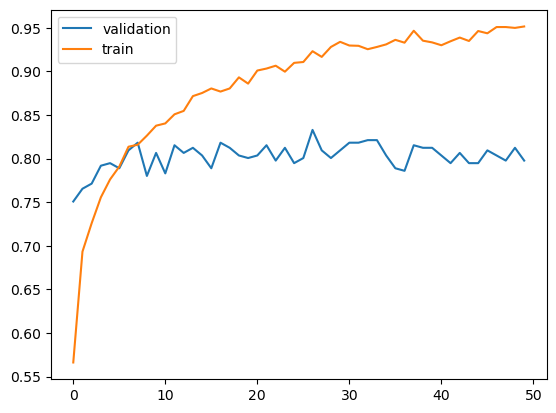

In [96]:
hist = history.history
plt.plot(hist['val_accuracy'], label='validation')
plt.plot(hist['accuracy'], label='train')
plt.legend()

## Training a larger model

Now let's increase the image input size from 150 to 299, reduce the amount of data augmentation parameters and lower the learning rate. This gives us the best results than any previous experiments.

In [97]:
# Function to define model by adding new dense layer and dropout
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(input_size,input_size,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # add dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [98]:
input_size = 299
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
    # shear_range=10,
    # zoom_range=0.1,
    # horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small/train',
                                         target_size=(input_size,input_size),
                                         batch_size=32)

# Create image generator for train data and also augment the images
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input # we dont wanna change validation data
    # rotation_range=30,
    # width_shift_range=10.0,
    # height_shift_range=10.0,
    # shear_range=10,
    # zoom_range=0.1,
    # vertical_flip=True
)

val_ds = val_gen.flow_from_directory(directory='./clothing-dataset-small/validation',
                                         target_size=(input_size,input_size),
                                         batch_size=32,
                                         shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [99]:
# Create checkpoint to save best model for version 3
filepath = './xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [100]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

c:\Users\anugraha\miniconda3\envs\datascience\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6207 - loss: 1.1770

96/96 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.7340 - loss: 0.8043 - val_accuracy: 0.8328 - val_loss: 0.5002
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8546 - loss: 0.4462

96/96 ━━━━━━━━━━━━━━━━━━━━ 230s 2s/step - accuracy: 0.8579 - loss: 0.4266 - val_accuracy: 0.8563 - val_loss: 0.4010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8912 - loss: 0.3306

96/96 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.8836 - loss: 0.3359 - val_accuracy: 0.8651 - val_loss: 0.4035
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9006 - loss: 0.2825 - val_accuracy: 0.8592 - val_loss: 0.3924
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9155 - loss: 0.2441

96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9172 - loss: 0.2498 - val_accuracy: 0.8768 - val_loss: 0.3684
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9299 - loss: 0.2159 - val_accuracy: 0.8768 - val_loss: 0.3728
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9355 - loss: 0.1886 - val_accuracy: 0.8739 - val_loss: 0.3584
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9481 - loss: 0.1615

96/96 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9465 - loss: 0.1620 - val_accuracy: 0.8856 - val_loss: 0.3603
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.9518 - loss: 0.1443 - val_accuracy: 0.8680 - val_loss: 0.3813
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9586 - loss: 0.1302 - val_accuracy: 0.8798 - val_loss: 0.3652
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9690 - loss: 0.1140 - val_accuracy: 0.8710 - val_loss: 0.3696
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.9713 - loss: 0.1020 - val_accuracy: 0.8798 - val_loss: 0.3786
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.9697 - loss: 0.0959 - val_accuracy: 0.8622 - val_loss: 0.4123
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.9739 - loss: 0.0826 - val_accuracy: 0.8856 - val_loss: 0.3954
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.9788 - loss: 0.0718 - val_accuracy: 0.8798 - val_lo

96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9915 - loss: 0.0374 - val_accuracy: 0.8915 - val_loss: 0.4297
Epoch 22/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9948 - loss: 0.0355 - val_accuracy: 0.8622 - val_loss: 0.4687
Epoch 23/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9912 - loss: 0.0365 - val_accuracy: 0.8886 - val_loss: 0.4483
Epoch 24/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9948 - loss: 0.0303 - val_accuracy: 0.8827 - val_loss: 0.4443
Epoch 25/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9958 - loss: 0.0267 - val_accuracy: 0.8915 - val_loss: 0.4548
Epoch 26/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9934 - loss: 0.0258

96/96 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9919 - loss: 0.0294 - val_accuracy: 0.8944 - val_loss: 0.4478
Epoch 27/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9954 - loss: 0.0249 - val_accuracy: 0.8886 - val_loss: 0.4699
Epoch 28/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.9974 - loss: 0.0194 - val_accuracy: 0.8827 - val_loss: 0.5059
Epoch 29/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9958 - loss: 0.0215 - val_accuracy: 0.8915 - val_loss: 0.5027
Epoch 30/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9974 - loss: 0.0188 - val_accuracy: 0.8827 - val_loss: 0.5104
Epoch 31/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9967 - loss: 0.0161 - val_accuracy: 0.8827 - val_loss: 0.5449
Epoch 32/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9971 - loss: 0.0173 - val_accuracy: 0.8710 - val_loss: 0.5242
Epoch 33/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9987 - loss: 0.0143 - val_accuracy: 0.8739 - val_l

## Using the model

- loading the model
- evaluating the model
- getting predictions

In [101]:
model = keras.models.load_model('xception_v4_26_0.894.h5')
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)
test_ds = test_gen.flow_from_directory(
    directory='./clothing-dataset-small/test',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [102]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9005 - loss: 0.3382


[0.3382020890712738, 0.9005376100540161]

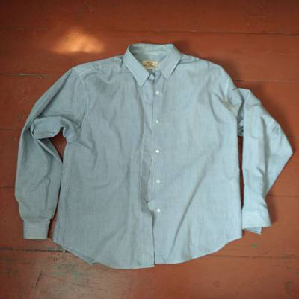

In [106]:
# Path of an image to make predictions
img_path = './clothing-dataset-small/test/shirt/adab8f60-032a-4c67-94fc-4d2902a27501.jpg'
# Load image
img = load_img(img_path, target_size=(299,299))
img

In [107]:

# Convert image to numpy array
x = np.array(img)
# Add batch dimension to the image
X = np.array([x])
# Preprocess the image 
X = preprocess_input(X)

In [108]:
pred = model.predict(X)
pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([-3.8295865, -5.3055367,  3.3213615,  2.2746484, -6.7219367,
       13.129606 , -6.5066547, -5.864495 , -5.492798 , -6.862095 ],
      dtype=float32)

In [109]:
classes = [
    'dress', 
    'hat', 
    'longsleeve', 
    'outwear', 
    'pants', 
    'shirt', 
    'shoes', 
    'shorts', 
    'skirt', 
    't-shirt'
]

In [110]:
dict(zip(classes, pred[0]))

{'dress': -3.8295865,
 'hat': -5.3055367,
 'longsleeve': 3.3213615,
 'outwear': 2.2746484,
 'pants': -6.7219367,
 'shirt': 13.129606,
 'shoes': -6.5066547,
 'shorts': -5.864495,
 'skirt': -5.492798,
 't-shirt': -6.862095}